# Chapter 6 Exercises - Linear Model Selection and Regularization

In [91]:
import numpy as np
import pandas as pd
from math import exp, log, sqrt, pi
import time
import itertools
from tqdm import trange

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.datasets import make_regression

import os.path

## Conceptual

**1.(a)** Best subset will have the smallest training RSS. The approach considers all possible permutations of p predictors. Consequently, we will identify the best portfolio of *p* predictors for the training set. The drawback is that this model is likely to be overfitted to the training data and is computationally expensive.

**1.(b)** No one approach is guaranteed to the provide the best performing model, i.e., smallest test error.

- Best subset is problematic because of the challenges in transferring the best training model to test model. The features that produce the smallest training MSE do not neccessarily generate the smallest testing MSE. If able to properly translate the training MSE to the test MSE, then best subset like is most likley to produce the smallest test error.
- Forward stepwise is most unlikely to provide the lowest MSE because the approach does not random permutations. It linearly appends features based on the which feature provides the most information gain. However, the order of features may not align with the portfolio of features that create the best answer. For example, forward stepwise will never select feature 2 and feature 3 because it is required to start with feature 1, which on its own may provide the most information gain.
- Backward stepwise requires that the number of observations is greater than the number of features.

**1.(c)**<br>
i) True  
<br>
ii) True 
<br>
iii) False
<br>
iv)False
<br>
v) False

### Notes on Model Flexibility

Model flexibility is how much a model's behavior is influenced by the data's characteristics. The Ridge and Lasso penalities/shrinkage factors decrease the affect of the dataset's characteristics on the model's behavior. Consequently, the Right and Lasso are less flexible than least square estimates.

In general, the **more flexible** the model, the **less bias** (in absolute value) and the **more variance** the model will produce when predicting on the test dataset.

#### Rules of Thumb
1. **Sample size is large and the number of predictors is small** - A **flexible model** performs **better**. The larger the sample size, the less likely to overfit even when using a more flexible model. Meanwhile, a more flexible model tends to reduce bias.

2. **Number of predictors is large and the sample size is small** - An **inflexible model** performs **better**. A flexible model will cause overfitting because of the small sample size. This usually means a bigger inflation in variance and a small reduction in bias.

3. **Relationship between the predictors and response is highly non-linear** - A **flexible model** performs **better**. A flexible model is required to find the non-linear effect.

4. **Variance of the errors is large** - An **inflexible model** performs **better**. A flexible model will capture too much of the noise in the data due to the large variance of the errors.

## Bias-Variance Tradeoff Notes

#### Bias Error
**Bias** are the simplifying assumptions made by a model to make the target function easier to learn.

Generally, linear algorithms have a high bias making them fast to learn and easier to understand but generally less flexible. In turn, they have lower predictive performance on complex problems that fail to meet the simplifying assumptions of the algorithms bias.

 - Low Bias: Suggests less assumptions about the form of the target function.
 - High-Bias: Suggests more assumptions about the form of the target function.

Examples of **low-bias** machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

Examples of **high-bias** machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

#### Variance Error

**Variance** is the amount that the estimate of the target function will change if different training data was used.

Machine learning algorithms that have a high variance are strongly influenced by the specifics of the training data. This means that the specifics of the training have influences the number and types of parameters used to characterize the mapping function.

 - Low Variance: Suggests small changes to the estimate of the target function with changes to the training dataset.
 - High Variance: Suggests large changes to the estimate of the target function with changes to the training dataset.

Generally, nonlinear machine learning algorithms that have a lot of flexibility have a high variance. For example, decision trees have a high variance, that is even higher if the trees are not pruned before use.

Examples of **low-variance** machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

Examples of **high-variance** machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

#### Lasso vs Least Squares

**2.(a).i** Incorrect - The Lasso is less flexible than least squares.

**2.(a).ii** Incorrect - The Lasso is less flexible than least squares.

**2.(a).iii** Correct - The Lasso's L1 regularization decreases the variance by constraining the influence of the dataset's characteristics. Some variables may be zero'ed out b/c of the shrinkage factors. This works well when the variance error is large or there are more features than observations.

**2.(a).iv** Incorrect - The Lasso decreases variance and increases bias.

#### Ridge vs Least Squares

**2.(b).i** Incorrect - The Ridge is less flexible than least squares.

**2.(b).ii** Incorrect - The Ridge is less flexible than least squares.

**2.(b).iii** Correct - The Ridge's L2 regularization decreases the variance by constraining the influence of the dataset's characteristics. The penalty decreases the values of the coefficients close to zero, but not to zero. This works well when the variance error is large or there are more features than observations.

**2.(b).iv** Incorrect - The Ridge decreases variance and increases bias.

#### Non-linear Methods vs Least Squares

**2.(c).i** Coorect - In general, non-linear methods reduce bias and increase variance. 

**2.(c).ii** Incorrect - PCR and PLS increase the bias and decrease the variance.

**2.(c).iii** Non-linear methods are more flexible than least squares.

**2.(c).iv** Incorrect - Non-linear methods are more flexible than least squares.

### 3.(a). Lasso Regression Coefficients

Steadily decrease. As we increase s, we are lifting the restrictions on βj, increasing the flexibility of the model and allowing a continuing reduction in training error.



### Ridge Regression Coefficients

4.(a). As **lambda increases**, the **training RSS** will decrease initially and then eventually start increasing.

4.(b). As **lambda increases**, the **testing RSS** will decrease initially and then eventually start increasing.

4.(c). As **lambda increases**, the **variance** steadily decreases.

4.(d). As **lambda increases**, the **bias** steadily increases.

4.(e). As **lambda increases**, the **irreducible error** remains constant.


### Ridge vs. Lasso

 - The Ridge regression tends to give similar coefficient values to correlated variables. Meanwhile, the lasso may give quote different coefficient values to correlated variables.
 - In Ridge regression, each least squares coefficient is shrunken by the same proportion.
 - The Lasso shrinks each least squares coefficeint towards zero by a constant amount.

## Applied

In [2]:
path = os.path.abspath('..')
college = pd.read_csv(path + '\data\College.csv', index_col=0)

In [3]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

Train Test Split

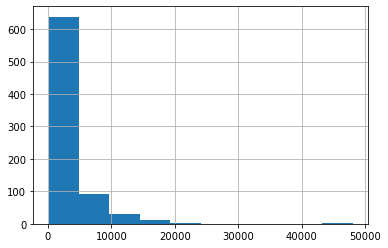

In [70]:
college['Apps'].hist()

In [49]:
# Feature Engineering
college['is_private'] = college['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

# Process the data
X = college.drop(['Apps','Private'], axis=1)
y = college['Apps']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 9.(b). Fit a linear model and report the test error

In [76]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)

print("Linear Regression Test MSE: {:.9}".format(mean_squared_error(y_test, y_pred)))

Linear Regression Test MSE: 1214538.74


### 9.(b). Fit a Ridge. Choose Lambda using cross-validation

In [80]:
# alpha = lambda
alphas = [0, 1, 5, 10, 100]

# already scaled features
ridge = Ridge(normalize=True)
coefs = []

for a in  alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

np.shape(coefs)

(5, 17)

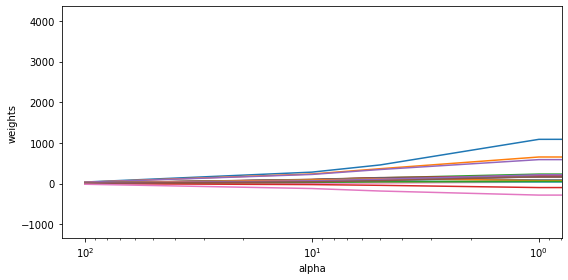

In [81]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylabel('weights')

fig.tight_layout();

#### Select optimal alpha using GridsearchCV

In [55]:
ridge = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=3)

alphas = [0, 1, 5, 10, 100]
grid = dict()
grid['alpha'] = alphas

gsearch = GridSearchCV(ridge, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

results = gsearch.fit(X_train_scaled, y_train)

print('Best MSE: {:.5}'.format(results.best_score_))
print('Best Alpha: {}'.format(results.best_params_['alpha']))

Best MSE: -1.2864e+06
Best Alpha: 0


### Train and Predict Value setting Alpha = 100

In [72]:
alpha=0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

print("Ridge Test MSE: {:.9}".format(mean_squared_error(y_test, y_pred)))

Ridge Test MSE: 1214538.74


## 9.(d) Lasso

In [79]:
lasso = Lasso(max_iter=10000)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=3)

grid = dict()
alphas = [0, 1, 5, 10, 100]
grid['alpha'] = alphas

gsearch = GridSearchCV(lasso, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

results = gsearch.fit(X_train_scaled, y_train)

print('Best MSE: {:.9}'.format(results.best_score_))
print('Best Alpha: {}'.format(results.best_params_['alpha']))

Best MSE: -1286385.81
Best Alpha: 0


C:\Users\morga\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321545713.38872546, tolerance: 967212.3266921093
  positive)


In [73]:
alpha=0
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

print("Ridge Test MSE: {:.9}".format(mean_squared_error(y_test, y_pred)))

Ridge Test MSE: 1214538.74


C:\Users\morga\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321545713.38872916, tolerance: 967212.3266921093
  positive)


## 9.(e). PCR

PCR is a regressor composed of two steps: first, PCA is applied to the training data, possibly performing dimensionality reduction; then, a regressor (e.g. a linear regressor) is trained on the transformed samples. In PCA, the transformation is purely unsupervised, meaning that no information about the targets is used. As a result, PCR may perform poorly in some datasets where the target is strongly correlated with directions that have low variance. 

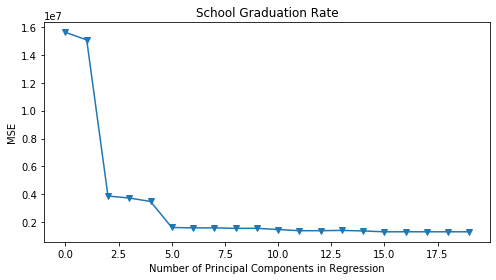

In [59]:
pca_model = PCA()
pca_model.fit(X_train)
X_train_reduced = pca_model.transform(X_train)
num_components_rng = np.arange(1, 20)

n = len(X_train_reduced)

linear_reg = LinearRegression(fit_intercept=True)
mse = []

kfold_10 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=3)
#kfold_10 = KFold(n_splits=10, random_state=3)

# Calculate MSE for intercept only. No components.
score = -1 * cross_val_score(linear_reg, np.ones((n, 1)), y_train.ravel(), cv=kfold_10, scoring='neg_mean_squared_error').mean()
mse.append(score)

for i in num_components_rng:
    score = -1 * cross_val_score(linear_reg, X_train_reduced[:, :i], y_train.ravel(), cv=kfold_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.figure(figsize=(7,4))
plt.plot(mse, '-v')
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title('Number of Applications Received')
plt.xlim(xmin=-1)
plt.tight_layout();


In [62]:
num_components = 5

pca_model_2 = PCA(n_components=num_components)
pca_model_2.fit(X_train_scaled)
X_train_reduced = pca_model_2.transform(X_train_scaled)

X_test_reduced = pca_model_2.transform(X_test_scaled)

lin_reg = LinearRegression()
lin_reg.fit(X_train_reduced, y_train)

y_pred = lin_reg.predict(X_test_reduced)
print("PCR MSE: ", mean_squared_error(y_test, y_pred))

PCR MSE:  1401720.3685540308


In [63]:
print("X_train_scaled Shape: ", X_train_scaled.shape)
print("X_train_reduced Shape: ", X_train_reduced.shape)
print("\n")
print("X_test_scaled Shape: ", X_test_scaled.shape)
print("X_test_reduced Shape: ", X_test_reduced.shape)


X_train_scaled Shape:  (621, 17)
X_train_reduced Shape:  (621, 5)


X_test_scaled Shape:  (156, 17)
X_test_reduced Shape:  (156, 5)


In [64]:
X_test_scaled.shape

(156, 17)

## 9.(f). PLS

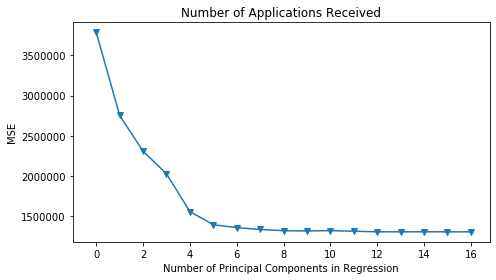

In [66]:
num_components_rng = np.arange(1, 18)

n = len(X_train_scaled)
mse = []

kfold_10 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=3)
#kfold_10 = KFold(n_splits=10, random_state=3)

for i in num_components_rng:
    pls = PLSRegression(n_components=i)
    score = -1 * cross_val_score(pls, X_train_scaled, y_train, cv=kfold_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.figure(figsize=(7,4))
plt.plot(mse, '-v')
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title('Number of Applications Received')
plt.xlim(xmin=-1)
plt.tight_layout();

In [67]:
num_components = 6
pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

y_pred = pls.predict(X_test_scaled)

print("PLS MSE: ", mean_squared_error(y_test, y_pred))

PLS MSE:  1471299.6625681205


# 10. Exploring Simulated Data Set

In [84]:
X, y = make_regression(n_samples=1000, n_features=20, noise=2, bias=1)

# 11. Predict Boston Crime Rate

In [86]:
path = os.path.abspath('..')
boston = pd.read_csv(path + '\data\Boston.csv')

boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


### Process Data

In [94]:
# Process the data
X = boston.drop(['crim'], axis=1)
y = boston['crim']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [95]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)

print("Linear Regression Test MSE: {:.3}".format(mean_squared_error(y_test, y_pred)))

Linear Regression Test MSE: 16.6


### Ridge Regression

In [96]:
ridge = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=3)

alphas = [0, 1, 5, 10, 100]
grid = dict()
grid['alpha'] = alphas

gsearch = GridSearchCV(ridge, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

results = gsearch.fit(X_train_scaled, y_train)

print('Best MSE: {:.5}'.format(results.best_score_))
print('Best Alpha: {}'.format(results.best_params_['alpha']))

Best MSE: -50.446
Best Alpha: 10


In [97]:
alpha=10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

print("Ridge Test MSE: {:.9}".format(mean_squared_error(y_test, y_pred)))

Ridge Test MSE: 15.9789976


### Lasso Regression

In [99]:
lasso = Lasso(max_iter=50000)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=3)

grid = dict()
alphas = [0, 1, 5, 10, 100]
grid['alpha'] = alphas

gsearch = GridSearchCV(lasso, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

results = gsearch.fit(X_train_scaled, y_train)

print('Best MSE: {:.9}'.format(results.best_score_))
print('Best Alpha: {}'.format(results.best_params_['alpha']))

Best MSE: -50.5987323
Best Alpha: 0


C:\Users\morga\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9384.37213443649, tolerance: 3.3483931287381217
  positive)


In [103]:
alpha=1
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

print("Ridge Test MSE: {:.9}".format(mean_squared_error(y_test, y_pred)))

Ridge Test MSE: 15.4961922


### PCR

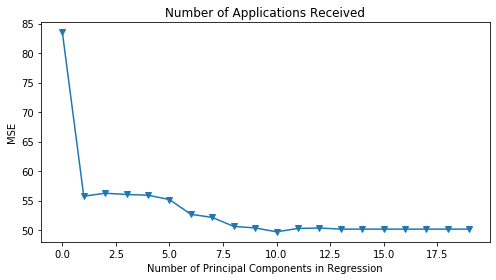

In [104]:
pca_model = PCA()
pca_model.fit(X_train)
X_train_reduced = pca_model.transform(X_train)
num_components_rng = np.arange(1, 20)

n = len(X_train_reduced)

linear_reg = LinearRegression(fit_intercept=True)
mse = []

kfold_10 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=3)
#kfold_10 = KFold(n_splits=10, random_state=3)

# Calculate MSE for intercept only. No components.
score = -1 * cross_val_score(linear_reg, np.ones((n, 1)), y_train.ravel(), cv=kfold_10, scoring='neg_mean_squared_error').mean()
mse.append(score)

for i in num_components_rng:
    score = -1 * cross_val_score(linear_reg, X_train_reduced[:, :i], y_train.ravel(), cv=kfold_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.figure(figsize=(7,4))
plt.plot(mse, '-v')
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title('Number of Applications Received')
plt.xlim(xmin=-1)
plt.tight_layout();

In [105]:
num_components = 10

pca_model_2 = PCA(n_components=num_components)
pca_model_2.fit(X_train_scaled)
X_train_reduced = pca_model_2.transform(X_train_scaled)

X_test_reduced = pca_model_2.transform(X_test_scaled)

lin_reg = LinearRegression()
lin_reg.fit(X_train_reduced, y_train)

y_pred = lin_reg.predict(X_test_reduced)
print("PCR MSE: ", mean_squared_error(y_test, y_pred))

PCR MSE:  16.161972869360085


### PLS

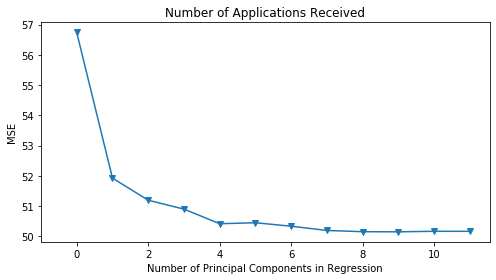

In [108]:
num_components_rng = np.arange(1, 13)

n = len(X_train_scaled)
mse = []

kfold_10 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=3)
#kfold_10 = KFold(n_splits=10, random_state=3)

for i in num_components_rng:
    pls = PLSRegression(n_components=i)
    score = -1 * cross_val_score(pls, X_train_scaled, y_train, cv=kfold_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.figure(figsize=(7,4))
plt.plot(mse, '-v')
plt.xlabel('Number of Principal Components in Regression')
plt.ylabel('MSE')
plt.title('Number of Applications Received')
plt.xlim(xmin=-1)
plt.tight_layout();

In [109]:
num_components = 4
pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)

y_pred = pls.predict(X_test_scaled)

print("PLS MSE: ", mean_squared_error(y_test, y_pred))

PLS MSE:  16.61507075066454
